In [1]:
# Bibliotecas mínimas
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 100)


In [2]:
# Bibliotecas mínimas
# Upload/Leitura do CSV (SIMPLIFICADO)
# Tente abrir seletor de arquivos do Colab; se não for Colab, lê de caminho local.
try:
    from google.colab import files  # type: ignore
    print("Colab detectado. Selecione o arquivo CSV...")
    up = files.upload()
    fname = next(iter(up.keys()))
    # Try reading with different encodings
    try:
        df = pd.read_csv(io.BytesIO(up[fname]), encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(io.BytesIO(up[fname]), encoding='latin-1')

except Exception as e:
    print(f"An error occurred: {e}")
    df = None # Set df to None if reading fails


if df is not None:
    print("Amostra dos dados:")
    display(df.head())

    # Garanta tipos numéricos nas colunas principais (se existirem)
    for col in ["Horas_Planejadas","Horas_Reais","Story points","Pontos(Dependencia)"]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")

    # Status tratado em minúsculas para facilitar comparações
    #if "Status" in df.columns:
     #   df["Status_lc"] = df["Status"].astype(str).str.lower()
    #else:
     #   df["Status_lc"] = ""
else:
    print("Could not load the dataframe.")

Colab detectado. Selecione o arquivo CSV...


Saving base_inclusao_tratada.csv to base_inclusao_tratada.csv
Amostra dos dados:


,Sprint,Responsável,Data Inicio,Data Fim,Complexidade,Story points,Pontos(Dependencia),Horas_Planejadas,Horas_Reais
0,1,Hobedes Albuquerque,25/04/25,25/04/25,media,3,0.9,17,23.5
1,1,Thiago Moura,28/04/25,01/05/25,media,3,0.7,16,20.0
2,1,Ana Paula Barros,30/04/25,30/04/25,media,3,0.6,17,23.0
3,1,Hobedes Albuquerque,03/04/25,07/05/25,alta,5,1.0,29,48.0
4,1,Thiago Moura,26/04/25,07/05/25,alta,5,1.0,25,42.0


Tratamento dos Dados
I

In [3]:
# Converter datas
df["Data Inicio"] = pd.to_datetime(df["Data Inicio"], format="%d/%m/%y", errors="coerce")
df["Data Fim"] = pd.to_datetime(df["Data Fim"], format="%d/%m/%y", errors="coerce")

# Criar features derivadas
df["Duracao_dias"] = (df["Data Fim"] - df["Data Inicio"]).dt.days
df["Atraso_horas"] = df["Horas_Reais"] - df["Horas_Planejadas"]
df["Atraso"] = np.where(df["Horas_Planejadas"] > 0,
                          (df["Horas_Reais"] - df["Horas_Planejadas"]) / df["Horas_Planejadas"],
                          np.nan)
df["Capacidade_realizada"] = np.where(df["Horas_Reais"] > 0,
                                      df["Story points"] / df["Horas_Reais"],
                                      np.nan)

# Mapear complexidade para números
complexidade_map = {"baixa": 1, "media": 2, "alta": 3}
df["Complexidade_num"] = df["Complexidade"].map(complexidade_map)

# Codificar responsável
#df["Responsavel_cod"] = df["Responsável"].astype("category").cat.codes

In [4]:
import numpy as np

df_novo = df.drop(columns=['Responsável'])

# Remover a coluna 'equipe' que simulava equipes diferentes
if 'equipe' in df_novo.columns:
    df_novo = df_novo.drop(columns=['equipe'])

# Criar uma nova coluna simulando a quantidade de pessoas alocadas a cada tarefa
# Gerando números aleatórios entre 1 e 5 para a quantidade de pessoas por tarefa
df_novo['pessoas_na_tarefa'] = np.random.randint(1, 6, size=len(df_novo))


display(df_novo.head())

,Sprint,Data Inicio,Data Fim,Complexidade,Story points,Pontos(Dependencia),Horas_Planejadas,Horas_Reais,Duracao_dias,Atraso_horas,Atraso,Capacidade_realizada,Complexidade_num,pessoas_na_tarefa
0,1,2025-04-25,2025-04-25,media,3,0.9,17,23.5,0,6.5,0.382353,0.127660,2,2
1,1,2025-04-28,2025-05-01,media,3,0.7,16,20.0,3,4.0,0.250000,0.150000,2,1
2,1,2025-04-30,2025-04-30,media,3,0.6,17,23.0,0,6.0,0.352941,0.130435,2,5
3,1,2025-04-03,2025-05-07,alta,5,1.0,29,48.0,34,19.0,0.655172,0.104167,3,5
4,1,2025-04-26,2025-05-07,alta,5,1.0,25,42.0,11,17.0,0.680000,0.119048,3,1


In [5]:
# ===============================
# 3. Criar variável alvo (risco alto/baixo)
# ===============================
df_novo["Risco_alto"] = np.where(df["Atraso"] > 0.2, 1, 0)

#df_novo.head()

df_novo

### A coluna Risco_alto foi criada com base na coluna Atraso_%. Quando Risco_alto é zero, significa que o valor na coluna Atraso_% para aquela linha é menor ou igual a 0.2 (ou 20%). Em outras palavras, o atraso em horas reais em relação às horas planejadas foi de no máximo 20%.



,Sprint,Data Inicio,Data Fim,Complexidade,Story points,Pontos(Dependencia),Horas_Planejadas,Horas_Reais,Duracao_dias,Atraso_horas,Atraso,Capacidade_realizada,Complexidade_num,pessoas_na_tarefa,Risco_alto
0,1,2025-04-25,2025-04-25,media,3,0.9,17,23.5,0,6.5,0.382353,0.127660,2,2,1
1,1,2025-04-28,2025-05-01,media,3,0.7,16,20.0,3,4.0,0.250000,0.150000,2,1,1
2,1,2025-04-30,2025-04-30,media,3,0.6,17,23.0,0,6.0,0.352941,0.130435,2,5,1
3,1,2025-04-03,2025-05-07,alta,5,1.0,29,48.0,34,19.0,0.655172,0.104167,3,5,1
4,1,2025-04-26,2025-05-07,alta,5,1.0,25,42.0,11,17.0,0.680000,0.119048,3,1,1
5,1,2025-05-07,2025-05-20,alta,5,1.0,26,45.0,13,19.0,0.730769,0.111111,3,1,1
6,1,2025-05-20,2025-05-30,alta,5,1.0,28,47.0,10,19.0,0.678571,0.106383,3,4,1
7,1,2025-05-10,2025-05-30,alta,5,0.0,6,8.0,20,2.0,0.333333,0.625000,3,4,1
8,1,2025-05-30,2025-06-07,baixa,1,1.0,5,10.0,8,5.0,1.000000,0.100000,1,5,1
9,1,2025-05-23,2025-05-30,baixa,1,0.0,23,27.0,7,4.0,0.173913,0.037037,1,2,0



=== Modelo de Capacidade ===
MAE: 0.35623778627987296
R²: 0.9340860961702891


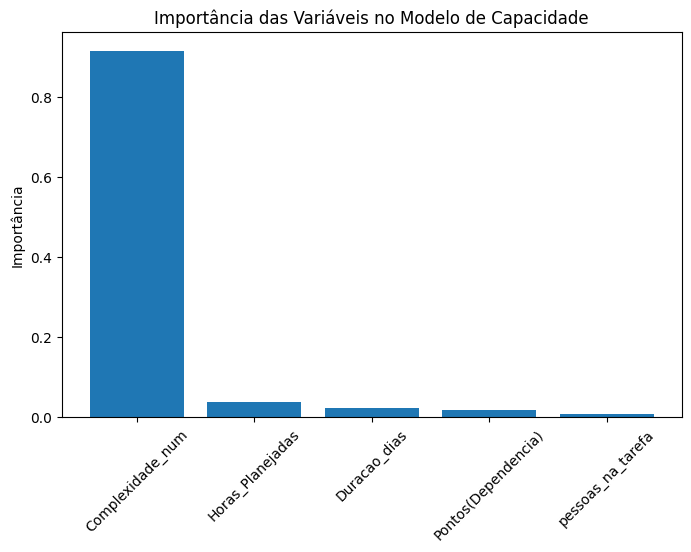

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# =================================
# 4. Modelo de CAPACIDADE
# =================================
# Target: Story points entregues
features_capacity = [
    "Horas_Planejadas",
    "Duracao_dias",
    "Complexidade_num",
    "Pontos(Dependencia)",
    "pessoas_na_tarefa" # Usando a nova coluna
]

df_capacity = df_novo.dropna(subset=features_capacity + ["Story points"])
X_cap = df_capacity[features_capacity]
y_cap = df_capacity["Story points"]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cap, y_cap, test_size=0.3, random_state=42)

gb_model = GradientBoostingRegressor(random_state=42, n_estimators=200)
gb_model.fit(X_train_c, y_train_c)
y_pred_c = gb_model.predict(X_test_c)

print("\n=== Modelo de Capacidade ===")
print("MAE:", mean_absolute_error(y_test_c, y_pred_c))
print("R²:", r2_score(y_test_c, y_pred_c))

importancias_c = pd.DataFrame({
    "Variável": features_capacity,
    "Importância": gb_model.feature_importances_
}).sort_values(by="Importância", ascending=False)

plt.figure(figsize=(8,5))
plt.bar(importancias_c["Variável"], importancias_c["Importância"])
plt.title("Importância das Variáveis no Modelo de Capacidade")
plt.ylabel("Importância")
plt.xticks(rotation=45)
plt.show()

Aqui está a explicação dos resultados:

    MAE (Mean Absolute Error): O MAE é uma métrica que mede a diferença média absoluta entre os valores previstos pelo seu modelo e os valores reais. Um MAE de 0.339 significa que, em média, as previsões do seu modelo para "Story points" estão erradas por cerca de 0.34 pontos. Quanto menor o MAE, melhor o modelo.
    R² (R-squared): O R² é uma métrica que indica o quão bem as variáveis independentes no seu modelo explicam a variabilidade da variável dependente ("Story points"). Um R² de 0.921 (ou 92.1%) é um resultado muito bom! Isso sugere que aproximadamente 92.1% da variação nos "Story points" pode ser explicada pelas variáveis que você usou no modelo ("Horas_Planejadas", "Duracao_dias", "Complexidade_num", "Pontos(Dependencia)", e "equipe"). Quanto mais próximo de 1 (ou 100%), melhor o ajuste do modelo aos dados.
    Importância das Variáveis: O gráfico de barras mostra quais variáveis foram mais importantes para o seu modelo Gradient Boosting na previsão dos "Story points".
        A variável "Complexidade_num" (complexidade convertida para número) tem a maior importância de longe, indicando que a complexidade da tarefa é o fator mais relevante para determinar os "Story points".
        As outras variáveis ("Horas_Planejadas", "equipe", "Duracao_dias" e "Pontos(Dependencia)") têm importâncias muito menores, mas ainda contribuem para a previsão.

Em resumo, o modelo de capacidade parece estar funcionando muito bem, com um alto R² e um MAE relativamente baixo, e a complexidade da tarefa é o principal fator que influencia a quantidade de "Story points".

In [ ]:
# Exemplo de como usar o modelo para fazer uma previsão
# Crie um dicionário com os valores das features para a nova tarefa.
# Use os mesmos nomes de colunas que foram usados no treinamento:
# "Horas_Planejadas", "Duracao_dias", "Complexidade_num", "Pontos(Dependencia)", "pessoas_na_tarefa"

# Exemplo: Uma tarefa com 20 horas planejadas, 5 dias de duração, complexidade média (2),
# 0.5 pontos de dependência e com 3 pessoas na tarefa.
horas_planejadas_nova_cap = 20
duracao_dias_nova_cap = 5
complexidade_num_nova_cap = 2 # 1 para baixa, 2 para media, 3 para alta
pontos_dependencia_nova_cap = 0.5
pessoas_na_tarefa_nova_cap = 3

nova_tarefa_features_cap = {
    "Horas_Planejadas": [horas_planejadas_nova_cap],
    "Duracao_dias": [duracao_dias_nova_cap],
    "Complexidade_num": [complexidade_num_nova_cap],
    "Pontos(Dependencia)": [pontos_dependencia_nova_cap],
    "pessoas_na_tarefa": [pessoas_na_tarefa_nova_cap]
}

# Converta o dicionário em um DataFrame, pois o modelo espera um DataFrame como entrada
nova_tarefa_df_cap = pd.DataFrame(nova_tarefa_features_cap)

# Faça a previsão usando o modelo treinado (gb_model)
previsao_story_points = gb_model.predict(nova_tarefa_df_cap)

print(f"Para uma tarefa com:\n"
      f"  Horas Planejadas: {horas_planejadas_nova_cap}\n"
      f"  Duração em dias: {duracao_dias_nova_cap}\n"
      f"  Complexidade: {list(complexidade_map.keys())[list(complexidade_map.values()).index(complexidade_num_nova_cap)]} ({complexidade_num_nova_cap})\n"
      f"  Pontos de Dependência: {pontos_dependencia_nova_cap}\n"
      f"  Pessoas na Tarefa: {pessoas_na_tarefa_nova_cap}\n\n"
      f"A estimativa de Story points do modelo é: {previsao_story_points[0]:.2f}")

Para uma tarefa com:
  Horas Planejadas: 20
  Duração em dias: 5
  Complexidade: media (2)
  Pontos de Dependência: 0.5
  Pessoas na Tarefa: 3

A estimativa de Story points do modelo é: 3.02
